<a href="https://colab.research.google.com/github/starrydata/notebooks/blob/main/02_Visualize_the_curve_dataset_of_Starrrydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize the curve dataset of Starrydata






## 1.Download the latest dataset


You can use the starrykit library to download the latest dataset of Starrydata uploaded to Figshare. The downloaded dataset will be extracted under a folder named with the date.

In [ ]:
!python -m pip install --index-url https://test.pypi.org/simple/ --no-deps starrykit==0.0.6

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
# load libraries
import pandas as pd
import json
from starrykit import dataset
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import matplotlib.pyplot as plt


In [ ]:
# Download the latest dataset
published_date = dataset.download_dataset()
# Load the data from the CSV file into a DataFrame named df_curves
df = pd.read_csv(f'/content/{published_date}/all_curves.csv')

In [ ]:
# Display the first few lines of the DataFrame to get an initial view of the data
df.head()

,SID,DOI,composition,sample_id,figure_id,prop_x,prop_y,unit_x,unit_y,x,y,created_at,updated_at,project_names,comments
0,6,10.1021/am405410e,Pb1.00025Zn0.02Te1.02I0.0005,113,79,Temperature,Seebeck coefficient,K,V*K^(-1),"[""2.998597e+2"",""3.248683e+2"",""3.498757e+2"",""3....","[""-1.484452e-4"",""-1.602763e-4"",""-1.729511e-4"",...",Fri Sep 01 2017 18:19:39 GMT+0900 (JST),Fri Sep 01 2017 18:19:39 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
1,6006,10.1002/adma.201004200,Na0.0035Pb0.9965Se1,147,80,Temperature,Seebeck coefficient,K,V*K^(-1),"[""3.177914e+2"",""3.791411e+2"",""3.840491e+2"",""4....","[""7.275950e-5"",""7.374922e-5"",""9.257471e-5"",""1....",Fri Sep 01 2017 18:19:39 GMT+0900 (JST),Fri Sep 01 2017 18:19:39 GMT+0900 (JST),"[""ThermoelectricMaterials"",""GeneralDB""]",NaN
2,6444,10.1002/anie.200803934,Pb1.03Sb0.03Te1,434,81,Temperature,Seebeck coefficient,K,V*K^(-1),"[""3.331159e+2"",""3.405494e+2"",""3.479830e+2"",""3....","[""-2.353740e-5"",""-2.455838e-5"",""-2.681692e-5"",...",Fri Sep 01 2017 18:19:39 GMT+0900 (JST),Fri Sep 01 2017 18:19:39 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
3,5867,10.1016/j.actamat.2016.03.059,Pb0.76Mn0.24Te1Na0.04,248,83,Temperature,Seebeck coefficient,K,V*K^(-1),"[""3.432468e+2"",""3.763636e+2"",""4.238961e+2"",""4....","[""1.875000e-4"",""2.044481e-4"",""2.339610e-4"",""2....",Fri Sep 01 2017 18:19:39 GMT+0900 (JST),Fri Sep 01 2017 18:19:39 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
4,3485,10.1021/ja109138p,Pb1S0.84Te0.16Cl0.00134,389,84,Temperature,Seebeck coefficient,K,V*K^(-1),"[""3.038348e+2"",""3.209667e+2"",""3.439541e+2"",""3....","[""-9.128622e-5"",""-9.944682e-5"",""-1.051682e-4"",...",Fri Sep 01 2017 18:19:39 GMT+0900 (JST),Fri Sep 01 2017 18:19:39 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN


## 2. Column descriptions for 'all_curves.csv':

- SID: Unique identifier for each paper within Starrydata. SID stands for Starrydata ID.
- DOI: Stands for Digital Object Identifier. It's a unique alphanumeric string used to identify digital documents.
- Composition: Represents the chemical composition of the sample.
- Sample_ID: Unique identifier for each sample within Starrydata.
- Figure_ID: Unique identifier for each graph within Starrydata.
- Prop_X: Property represented on the X-axis of the graph.
- Prop_Y: Property represented on the Y-axis of the graph.
- Unit_X: Unit of measurement for the X-axis property.
- Unit_Y: Unit of measurement for the Y-axis property.
- X: Values for X, in array format. The number of data points is the same as in Y.
- Y: Values for Y, in array format. The number of data points is the same as in X.
- Created_At: The date when this curve was first collected. It's in standard date-time format, including time zone.
- Updated_At: The most recent date when this curve was updated. Standard date-time format, including time zone.
- Project_Names: Names of the projects associated with this data. As one paper can span multiple projects, this is in array format.
- Comments: Additional remarks or annotations about the data entry.

## 3. Drawing Graphs for Specified Physical Quantities

### 3-1. Converting X and Y Values for Compatibility with Python

In [ ]:
# Display the first row of the 'x' column from the DataFrame 'df' to quickly inspect the data format and values
df[['x', 'y']].head(1)

,x,y
0,"[""2.998597e+2"",""3.248683e+2"",""3.498757e+2"",""3....","[""-1.484452e-4"",""-1.602763e-4"",""-1.729511e-4"",..."


Upon inspecting the XY values, it's noticed that the numbers are enclosed in double quotations.
This is because the original data is in CSV format.
```
df[['x']].head(1)
["2.998597e+2","3.248683e+2","3.498757e+2","3.752454e+2","3.998985e+2","4.249096e+2","4.502777e+2","4.749324e+2","4.999427e+2","5.253124e+2","5.499651e+2","5.749798e+2","6.003491e+2","6.250047e+2","6.500201e+2"]
```
Since the data is comma-separated,
double quotations were necessary to encapsulate list-type data.

However, this format is not directly usable with Python. To address this, a specialized function will be prepared to convert these string-represented lists into a list of numerical values that Python can handle.

First, we'll create the function and then apply it to all XY values.

In [ ]:
df_2 = df.copy()

# Function to convert string array to float array using json.loads
def convert_to_float_array(str_array):
    return list(map(lambda y: float(y), json.loads(str_array)))

# Applying the function to the 'x' and 'y' columns of the dataframe
df_2['x'] = df_2['x'].apply(convert_to_float_array)
df_2['y'] = df_2['y'].apply(convert_to_float_array)

In [ ]:
# Display the first row of the 'x' column from the DataFrame 'df' to quickly inspect the data format and values
df_2[['x', 'y']].head(1)

,x,y
0,"[299.8597, 324.8683, 349.8757, 375.2454, 399.8...","[-0.0001484452, -0.0001602763, -0.0001729511, ..."


You will notice that the X and Y values have been converted to a format without double quotations.

### 3-2. Drawing a Graph

### 3-2-1. Select the desired properties

First, we'll select the desired properties from the dataframe and place them into a separate dataframe.

We will use "Temperature" as the property for the X-axis and "Carrier mobility" for the Y-axis here.

In [ ]:
# Define the properties for the X and Y axes
prop_x = 'Temperature'
prop_y = "Carrier mobility"

# Filter the dataframe to include only rows where 'prop_x' matches 'Temperature'
# and 'prop_y' matches 'Carrier Mobility'
df_3 = df_2[(df_2['prop_x'] == prop_x) & (df_2['prop_y'] == prop_y)]

### 3-2-2. Visualize with Matplotlib

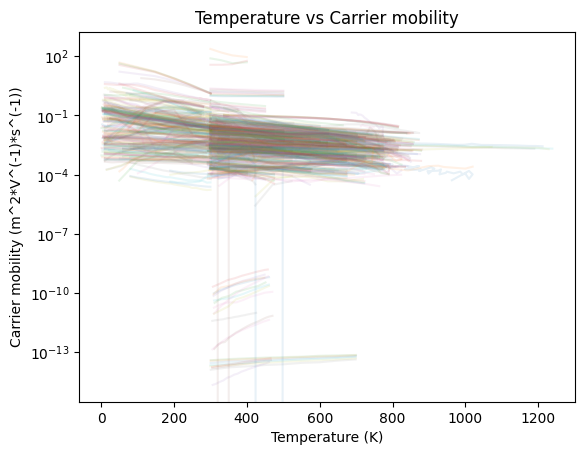

In [ ]:
# The first row's units are representative for the filtered dataframe
unit_x = df_3['unit_x'].iloc[0]  # Get unit for X-axis property
unit_y = df_3['unit_y'].iloc[0]  # Get unit for Y-axis property

# Iterate through each row in the filtered dataframe
for index, row in df_3.iterrows():
    # Plot each line using 'x' and 'y' values from the row with a transparency (alpha) of 0.1
    plt.plot(row['x'], row['y'], alpha=0.1)

# Set the label for the X-axis using the 'prop_x' variable
plt.xlabel(f'{prop_x} ({unit_x})')
# Set the label for the Y-axis using the 'prop_y' variable
plt.ylabel(f'{prop_y} ({unit_y})')
# Set the title of the plot
plt.title(f'{prop_x} vs {prop_y}')

# Set the Y-axis to a logarithmic scale for better visibility of data
plt.yscale('log')

# Display the plot
plt.show()


### 3-2-3. Visualize with Bokeh

In [ ]:
output_notebook()  # Display Bokeh plots in a Jupyter notebook

# The first row's units are representative for the filtered dataframe
unit_x = df_3['unit_x'].iloc[0]  # Get unit for X-axis property
unit_y = df_3['unit_y'].iloc[0]  # Get unit for Y-axis property

# Create a new plot with specified size and title
plot = figure(title=f'{prop_x} vs {prop_y}',
              x_axis_label=f'{prop_x} ({unit_x})',
              y_axis_label=f'{prop_y} ({unit_y})',
              x_range=(0, 1500),
              y_axis_type="log")

# Loop through each row and plot the line
for index, row in df_3.iterrows():
    plot.line(row['x'], row['y'], line_alpha=0.1)

# Output to static HTML file
output_file(f'{prop_x}-{prop_y}.html')

# Show the plot
show(plot)
